In [1]:
import numpy as np

def load_model_data(model_num, lc, bc, tc, lm, bm, tm, theta, pos):
	with open('model-' + str(model_num) + '.txt') as f:
		lines_list = f.readlines()
	row_list = []
	for line in lines_list:
		row_ele_list = []
		for row_ele in line[: -1].split():
			row_ele_list.append(float(row_ele))
		row_list.append(row_ele_list)
	model_data_arr = np.array(row_list)

	input_vector_less_freq = np.array([[lc, bc, tc, lm, bm, tm, theta, pos]])
	num_examples = model_data_arr.shape[0]
	num_input_features = input_vector_less_freq.shape[1] + 1

	X = np.zeros((num_examples, num_input_features))
	X[:, 0 : -1] = input_vector_less_freq
	X[:, -1 :] = model_data_arr[:, 0 : 1]

	Y = np.zeros((num_examples, 1))
	Y[:, 0 : 1] = model_data_arr[:, 1 : 2]

	return X, Y

In [2]:
def load_all_model_data():
	lc_list = [0.1, 0.2, 0.25]
	bc_list = [0.050, 0.055, 0.07]
	tc_list = [0.0005, 0.001, 0.002]
	lm = 0.028
	bm = 0.014
	tm = 0.00025
	theta = 0.0
	pos = 0.01533
	model_num = 1
	num_datasets_available = 4
	X_list = []
	Y_list = []
	num_examples_list = []
	for lc in lc_list:
		for bc in bc_list:
			for tc in tc_list:
				if model_num <= num_datasets_available:
					X, Y = load_model_data(model_num, lc, bc, tc, lm, bm, tm, theta, pos)
					X_list.append(X)
					Y_list.append(Y)
					num_examples_list.append(X.shape[0])
					model_num += 1
				else:
					return X_list, Y_list, num_examples_list
X_list, Y_list, num_examples_list = load_all_model_data()
X = np.concatenate(X_list)
Y = np.concatenate(Y_list)

In [3]:
def my_loss_fn(y_true, y_pred):
	return tf.reduce_mean(tf.abs(y_true - y_pred) ** 1.5)

def plot_all_model_pot_vs_freq(X, Y, num_examples_list):
	start_example = 0
	model_num = 1
	model_names_list = []
	for num_examples in num_examples_list:
		next_start_example = start_example + num_examples
		plt.plot(X[start_example : next_start_example, -1 :], Y[start_example : next_start_example], marker = ".")
		start_example = next_start_example
		model_names_list.append('model-' + str(model_num))
		model_num += 1
	plt.legend(model_names_list)
	plt.show()


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras.models import save_model, load_model
from keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
X_list, Y_list, num_examples_list = load_all_model_data()
X = np.concatenate(X_list)
Y = np.concatenate(Y_list)
m = 10
X = X[0 : m]
Y = Y[0 : m]

num_hidden_layers = 10
model = Sequential()
model.add(BatchNormalization())
for hidden_layer_num in range(num_hidden_layers):
    model.add(Dense(64, activation = 'tanh'))
    model.add(BatchNormalization())
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')


In [9]:
num_epochs = 5000
model.fit(X, Y, epochs = num_epochs)

Y_pred = model.predict(X)

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 4.4240
Epoch 2/5000
1/1 [==============================] - 0s 24ms/step - loss: 5.3818
Epoch 3/5000
1/1 [==============================] - 0s 24ms/step - loss: 8.0520
Epoch 4/5000
1/1 [==============================] - 0s 26ms/step - loss: 9.5929
Epoch 5/5000
1/1 [==============================] - 0s 22ms/step - loss: 6.4106
Epoch 6/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.4333
Epoch 7/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.7976
Epoch 8/5000
1/1 [==============================] - 0s 22ms/step - loss: 7.0381
Epoch 9/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.5087
Epoch 10/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.1168
Epoch 11/5000
1/1 [==============================] - 0s 21ms/step - loss: 9.8690
Epoch 12/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.1666
Epoch 13/5000
1/1 [====================

1/1 [==============================] - 0s 29ms/step - loss: 4.3360
Epoch 103/5000
1/1 [==============================] - 0s 34ms/step - loss: 6.5528
Epoch 104/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.3512
Epoch 105/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.7726
Epoch 106/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.1699
Epoch 107/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3625
Epoch 108/5000
1/1 [==============================] - 0s 22ms/step - loss: 7.2021
Epoch 109/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.6268
Epoch 110/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1261
Epoch 111/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.0278
Epoch 112/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.8156
Epoch 113/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.7233
Epoch 114/5000
1/1 [===========

1/1 [==============================] - 0s 22ms/step - loss: 6.5919
Epoch 203/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.0401
Epoch 204/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.5314
Epoch 205/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.6244
Epoch 206/5000
1/1 [==============================] - 0s 21ms/step - loss: 7.4491
Epoch 207/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.8012
Epoch 208/5000
1/1 [==============================] - 0s 31ms/step - loss: 3.1748
Epoch 209/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.4980
Epoch 210/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.2241
Epoch 211/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.2591
Epoch 212/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.3112
Epoch 213/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.8763
Epoch 214/5000
1/1 [===========

1/1 [==============================] - 0s 23ms/step - loss: 5.4710
Epoch 303/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.8778
Epoch 304/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1366
Epoch 305/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.7538
Epoch 306/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.5897
Epoch 307/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.7801
Epoch 308/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.8285
Epoch 309/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0405
Epoch 310/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1392
Epoch 311/5000
1/1 [==============================] - 0s 23ms/step - loss: 6.4274
Epoch 312/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.6469
Epoch 313/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.5176
Epoch 314/5000
1/1 [===========

1/1 [==============================] - 0s 24ms/step - loss: 2.8204
Epoch 403/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.9234
Epoch 404/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.2875
Epoch 405/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.3264
Epoch 406/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.4006
Epoch 407/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.0674
Epoch 408/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1566
Epoch 409/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.8320
Epoch 410/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.5054
Epoch 411/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.7826
Epoch 412/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.2213
Epoch 413/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.7704
Epoch 414/5000
1/1 [===========

1/1 [==============================] - 0s 20ms/step - loss: 5.7680
Epoch 503/5000
1/1 [==============================] - 0s 21ms/step - loss: 8.0482
Epoch 504/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.8666
Epoch 505/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0303
Epoch 506/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1320
Epoch 507/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.5338
Epoch 508/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1062
Epoch 509/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.4193
Epoch 510/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.3585
Epoch 511/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.2453
Epoch 512/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.0785
Epoch 513/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.6859
Epoch 514/5000
1/1 [===========

1/1 [==============================] - 0s 24ms/step - loss: 4.2278
Epoch 603/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2361
Epoch 604/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.9806
Epoch 605/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.8640
Epoch 606/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.4626
Epoch 607/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1969
Epoch 608/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.3386
Epoch 609/5000
1/1 [==============================] - 0s 20ms/step - loss: 6.2288
Epoch 610/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.4978
Epoch 611/5000
1/1 [==============================] - 0s 19ms/step - loss: 6.0374
Epoch 612/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.9457
Epoch 613/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.4160
Epoch 614/5000
1/1 [===========

1/1 [==============================] - 0s 22ms/step - loss: 6.1825
Epoch 703/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.3945
Epoch 704/5000
1/1 [==============================] - 0s 24ms/step - loss: 5.1327
Epoch 705/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.3674
Epoch 706/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.0364
Epoch 707/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.6047
Epoch 708/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.1662
Epoch 709/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.2722
Epoch 710/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.2602
Epoch 711/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.9071
Epoch 712/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.0918
Epoch 713/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.5629
Epoch 714/5000
1/1 [===========

1/1 [==============================] - 0s 22ms/step - loss: 4.8249
Epoch 803/5000
1/1 [==============================] - 0s 24ms/step - loss: 5.9770
Epoch 804/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.9364
Epoch 805/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.1640
Epoch 806/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.2081
Epoch 807/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.1999
Epoch 808/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5337
Epoch 809/5000
1/1 [==============================] - 0s 21ms/step - loss: 6.2513
Epoch 810/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.2982
Epoch 811/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.5812
Epoch 812/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0196
Epoch 813/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.5503
Epoch 814/5000
1/1 [===========

1/1 [==============================] - 0s 20ms/step - loss: 5.7094
Epoch 903/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.1083
Epoch 904/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.3299
Epoch 905/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.5425
Epoch 906/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.4251
Epoch 907/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.9475
Epoch 908/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.4041
Epoch 909/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.2976
Epoch 910/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.7926
Epoch 911/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5695
Epoch 912/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.7319
Epoch 913/5000
1/1 [==============================] - 0s 22ms/step - loss: 4.1118
Epoch 914/5000
1/1 [===========

1/1 [==============================] - 0s 20ms/step - loss: 4.0417
Epoch 1003/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.5652
Epoch 1004/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.1857
Epoch 1005/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.2275
Epoch 1006/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.4150
Epoch 1007/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.0321
Epoch 1008/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.3832
Epoch 1009/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.6454
Epoch 1010/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.9827
Epoch 1011/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9480
Epoch 1012/5000
1/1 [==============================] - 0s 18ms/step - loss: 4.8347
Epoch 1013/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.7837
Epoch 1014/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 5.4363
Epoch 1101/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.7610
Epoch 1102/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0132
Epoch 1103/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.0020
Epoch 1104/5000
1/1 [==============================] - 0s 22ms/step - loss: 5.8183
Epoch 1105/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.3061
Epoch 1106/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.9028
Epoch 1107/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.2459
Epoch 1108/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.0051
Epoch 1109/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.0458
Epoch 1110/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5526
Epoch 1111/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.2674
Epoch 1112/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 4.4019
Epoch 1199/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3187
Epoch 1200/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.9845
Epoch 1201/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.6843
Epoch 1202/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.6554
Epoch 1203/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.9743
Epoch 1204/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3781
Epoch 1205/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9138
Epoch 1206/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.8774
Epoch 1207/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4622
Epoch 1208/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.9908
Epoch 1209/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.7117
Epoch 1210/5000
1/1 

1/1 [==============================] - 0s 23ms/step - loss: 3.1421
Epoch 1297/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.7547
Epoch 1298/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4042
Epoch 1299/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.1359
Epoch 1300/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.7380
Epoch 1301/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8959
Epoch 1302/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.9910
Epoch 1303/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.5036
Epoch 1304/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.0551
Epoch 1305/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1683
Epoch 1306/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5884
Epoch 1307/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.3623
Epoch 1308/5000
1/1 

1/1 [==============================] - 0s 24ms/step - loss: 3.5347
Epoch 1395/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.3306
Epoch 1396/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9698
Epoch 1397/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6205
Epoch 1398/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.3658
Epoch 1399/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4296
Epoch 1400/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6551
Epoch 1401/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2144
Epoch 1402/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2904
Epoch 1403/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.1082
Epoch 1404/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6221
Epoch 1405/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.8838
Epoch 1406/5000
1/1 

1/1 [==============================] - 0s 24ms/step - loss: 3.0568
Epoch 1493/5000
1/1 [==============================] - 0s 29ms/step - loss: 3.9392
Epoch 1494/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.9004
Epoch 1495/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.3755
Epoch 1496/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2261
Epoch 1497/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.7928
Epoch 1498/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.5173
Epoch 1499/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0663
Epoch 1500/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.4752
Epoch 1501/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1543
Epoch 1502/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.3647
Epoch 1503/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.9005
Epoch 1504/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 3.5295
Epoch 1591/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0396
Epoch 1592/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.6813
Epoch 1593/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.5815
Epoch 1594/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.0635
Epoch 1595/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3882
Epoch 1596/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.7184
Epoch 1597/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.9199
Epoch 1598/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6337
Epoch 1599/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.7580
Epoch 1600/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.7517
Epoch 1601/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.8539
Epoch 1602/5000
1/1 

1/1 [==============================] - 0s 23ms/step - loss: 3.3884
Epoch 1689/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2693
Epoch 1690/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.0273
Epoch 1691/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.1930
Epoch 1692/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.5251
Epoch 1693/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.9350
Epoch 1694/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2071
Epoch 1695/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9862
Epoch 1696/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.4721
Epoch 1697/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6259
Epoch 1698/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.1169
Epoch 1699/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6756
Epoch 1700/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 4.7057
Epoch 1787/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.8369
Epoch 1788/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6162
Epoch 1789/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.8760
Epoch 1790/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.5125
Epoch 1791/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.3139
Epoch 1792/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.7526
Epoch 1793/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.0053
Epoch 1794/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6420
Epoch 1795/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2744
Epoch 1796/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.3733
Epoch 1797/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2160
Epoch 1798/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 2.5447
Epoch 1885/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5144
Epoch 1886/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5974
Epoch 1887/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9114
Epoch 1888/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9361
Epoch 1889/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.0592
Epoch 1890/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7803
Epoch 1891/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5673
Epoch 1892/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7408
Epoch 1893/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.5988
Epoch 1894/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0820
Epoch 1895/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.9556
Epoch 1896/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 2.5426
Epoch 1983/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2618
Epoch 1984/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9268
Epoch 1985/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1966
Epoch 1986/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9091
Epoch 1987/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.7850
Epoch 1988/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.7567
Epoch 1989/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1304
Epoch 1990/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.3769
Epoch 1991/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9501
Epoch 1992/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9276
Epoch 1993/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6047
Epoch 1994/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 3.3818
Epoch 2081/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.7777
Epoch 2082/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.3577
Epoch 2083/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9664
Epoch 2084/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.5963
Epoch 2085/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7747
Epoch 2086/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.1884
Epoch 2087/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8034
Epoch 2088/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.1887
Epoch 2089/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.1027
Epoch 2090/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.6953
Epoch 2091/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6867
Epoch 2092/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 2.7301
Epoch 2179/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8019
Epoch 2180/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9463
Epoch 2181/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9137
Epoch 2182/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9584
Epoch 2183/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4814
Epoch 2184/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.6105
Epoch 2185/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6181
Epoch 2186/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.7987
Epoch 2187/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3745
Epoch 2188/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5765
Epoch 2189/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8966
Epoch 2190/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 3.6319
Epoch 2277/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4784
Epoch 2278/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.0623
Epoch 2279/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4394
Epoch 2280/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6219
Epoch 2281/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.7201
Epoch 2282/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.9372
Epoch 2283/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8301
Epoch 2284/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8701
Epoch 2285/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.1566
Epoch 2286/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2459
Epoch 2287/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6049
Epoch 2288/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 2.5557
Epoch 2375/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.5929
Epoch 2376/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3903
Epoch 2377/5000
1/1 [==============================] - 0s 20ms/step - loss: 5.0103
Epoch 2378/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.0262
Epoch 2379/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3137
Epoch 2380/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9937
Epoch 2381/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.7916
Epoch 2382/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8233
Epoch 2383/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1418
Epoch 2384/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.8436
Epoch 2385/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5542
Epoch 2386/5000
1/1 

1/1 [==============================] - 0s 19ms/step - loss: 2.3809
Epoch 2473/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0270
Epoch 2474/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9207
Epoch 2475/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5152
Epoch 2476/5000
1/1 [==============================] - 0s 18ms/step - loss: 3.5651
Epoch 2477/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3676
Epoch 2478/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9052
Epoch 2479/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.3797
Epoch 2480/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9521
Epoch 2481/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.1177
Epoch 2482/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5086
Epoch 2483/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7917
Epoch 2484/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 2.6465
Epoch 2571/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6184
Epoch 2572/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.5706
Epoch 2573/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5805
Epoch 2574/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2225
Epoch 2575/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9708
Epoch 2576/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9583
Epoch 2577/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.0137
Epoch 2578/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4704
Epoch 2579/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.1220
Epoch 2580/5000
1/1 [==============================] - 0s 19ms/step - loss: 4.1000
Epoch 2581/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8484
Epoch 2582/5000
1/1 

1/1 [==============================] - 0s 23ms/step - loss: 3.7578
Epoch 2669/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6777
Epoch 2670/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2157
Epoch 2671/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3170
Epoch 2672/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1418
Epoch 2673/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.7876
Epoch 2674/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.5918
Epoch 2675/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.0780
Epoch 2676/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.5065
Epoch 2677/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3656
Epoch 2678/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3750
Epoch 2679/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2535
Epoch 2680/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 2.1746
Epoch 2767/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.1135
Epoch 2768/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9282
Epoch 2769/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9329
Epoch 2770/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1491
Epoch 2771/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1354
Epoch 2772/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1368
Epoch 2773/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5426
Epoch 2774/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.7256
Epoch 2775/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.3794
Epoch 2776/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4726
Epoch 2777/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.7966
Epoch 2778/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 3.7437
Epoch 2865/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.5279
Epoch 2866/5000
1/1 [==============================] - 0s 20ms/step - loss: 4.2848
Epoch 2867/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.4524
Epoch 2868/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4202
Epoch 2869/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5020
Epoch 2870/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2857
Epoch 2871/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.1056
Epoch 2872/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9108
Epoch 2873/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.9950
Epoch 2874/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.0733
Epoch 2875/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1273
Epoch 2876/5000
1/1 

1/1 [==============================] - 0s 24ms/step - loss: 2.1508
Epoch 2963/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1846
Epoch 2964/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.8892
Epoch 2965/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.0180
Epoch 2966/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2487
Epoch 2967/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6225
Epoch 2968/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2514
Epoch 2969/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2198
Epoch 2970/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8557
Epoch 2971/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8177
Epoch 2972/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9664
Epoch 2973/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6447
Epoch 2974/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 2.2897
Epoch 3061/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4541
Epoch 3062/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.3891
Epoch 3063/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6775
Epoch 3064/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.0333
Epoch 3065/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4237
Epoch 3066/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9090
Epoch 3067/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4207
Epoch 3068/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.2685
Epoch 3069/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2434
Epoch 3070/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.7112
Epoch 3071/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.2435
Epoch 3072/5000
1/1 

1/1 [==============================] - 0s 24ms/step - loss: 2.3255
Epoch 3159/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9138
Epoch 3160/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.7610
Epoch 3161/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8318
Epoch 3162/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.6262
Epoch 3163/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3994
Epoch 3164/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.1705
Epoch 3165/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6742
Epoch 3166/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9529
Epoch 3167/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2061
Epoch 3168/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6900
Epoch 3169/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7279
Epoch 3170/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.5279
Epoch 3257/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8910
Epoch 3258/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.2292
Epoch 3259/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.0893
Epoch 3260/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7100
Epoch 3261/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.1568
Epoch 3262/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7874
Epoch 3263/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.4810
Epoch 3264/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8483
Epoch 3265/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.3826
Epoch 3266/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5198
Epoch 3267/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.7990
Epoch 3268/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 2.1645
Epoch 3355/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5964
Epoch 3356/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5610
Epoch 3357/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.0239
Epoch 3358/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.9136
Epoch 3359/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.1208
Epoch 3360/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2045
Epoch 3361/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1951
Epoch 3362/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1031
Epoch 3363/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4131
Epoch 3364/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.0329
Epoch 3365/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.9297
Epoch 3366/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 1.7265
Epoch 3453/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.3114
Epoch 3454/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.8018
Epoch 3455/5000
1/1 [==============================] - 0s 19ms/step - loss: 5.1843
Epoch 3456/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2873
Epoch 3457/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8612
Epoch 3458/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.7457
Epoch 3459/5000
1/1 [==============================] - 0s 28ms/step - loss: 1.9950
Epoch 3460/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6917
Epoch 3461/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4961
Epoch 3462/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.4412
Epoch 3463/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6562
Epoch 3464/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.7457
Epoch 3551/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.0311
Epoch 3552/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3486
Epoch 3553/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8135
Epoch 3554/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.5650
Epoch 3555/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2579
Epoch 3556/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6413
Epoch 3557/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8436
Epoch 3558/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8306
Epoch 3559/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.6203
Epoch 3560/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3251
Epoch 3561/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3308
Epoch 3562/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 2.0072
Epoch 3649/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9004
Epoch 3650/5000
1/1 [==============================] - 0s 26ms/step - loss: 1.6739
Epoch 3651/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2815
Epoch 3652/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7154
Epoch 3653/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.6080
Epoch 3654/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.2805
Epoch 3655/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.7628
Epoch 3656/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.9420
Epoch 3657/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.9006
Epoch 3658/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3165
Epoch 3659/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8865
Epoch 3660/5000
1/1 

1/1 [==============================] - 0s 19ms/step - loss: 2.7703
Epoch 3747/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5153
Epoch 3748/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0681
Epoch 3749/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1659
Epoch 3750/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8803
Epoch 3751/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.9747
Epoch 3752/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7940
Epoch 3753/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2667
Epoch 3754/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.8876
Epoch 3755/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7167
Epoch 3756/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3194
Epoch 3757/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.6373
Epoch 3758/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.6223
Epoch 3845/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.5326
Epoch 3846/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6361
Epoch 3847/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8857
Epoch 3848/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.2209
Epoch 3849/5000
1/1 [==============================] - 0s 18ms/step - loss: 1.9317
Epoch 3850/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8076
Epoch 3851/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8797
Epoch 3852/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.6956
Epoch 3853/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.3878
Epoch 3854/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1931
Epoch 3855/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5087
Epoch 3856/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 1.3412
Epoch 3943/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0968
Epoch 3944/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.2643
Epoch 3945/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.9152
Epoch 3946/5000
1/1 [==============================] - 0s 24ms/step - loss: 1.5182
Epoch 3947/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.6137
Epoch 3948/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1486
Epoch 3949/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4933
Epoch 3950/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7540
Epoch 3951/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5353
Epoch 3952/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5924
Epoch 3953/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8606
Epoch 3954/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.5466
Epoch 4041/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8903
Epoch 4042/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6090
Epoch 4043/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.6561
Epoch 4044/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.9814
Epoch 4045/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.4064
Epoch 4046/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2464
Epoch 4047/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6798
Epoch 4048/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4654
Epoch 4049/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.8799
Epoch 4050/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.5935
Epoch 4051/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3823
Epoch 4052/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.5305
Epoch 4139/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.1336
Epoch 4140/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4000
Epoch 4141/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.4369
Epoch 4142/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4085
Epoch 4143/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.6454
Epoch 4144/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.1435
Epoch 4145/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3124
Epoch 4146/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5660
Epoch 4147/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8107
Epoch 4148/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4545
Epoch 4149/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3837
Epoch 4150/5000
1/1 

1/1 [==============================] - 0s 25ms/step - loss: 1.4963
Epoch 4237/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4795
Epoch 4238/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7817
Epoch 4239/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.6992
Epoch 4240/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4272
Epoch 4241/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8059
Epoch 4242/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.1577
Epoch 4243/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3557
Epoch 4244/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5865
Epoch 4245/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.1098
Epoch 4246/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3247
Epoch 4247/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5329
Epoch 4248/5000
1/1 

1/1 [==============================] - 0s 24ms/step - loss: 1.2793
Epoch 4335/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8241
Epoch 4336/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.2441
Epoch 4337/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6464
Epoch 4338/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5871
Epoch 4339/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0636
Epoch 4340/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.8815
Epoch 4341/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7086
Epoch 4342/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.6656
Epoch 4343/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6838
Epoch 4344/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2795
Epoch 4345/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4128
Epoch 4346/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 2.9534
Epoch 4433/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.8613
Epoch 4434/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.5954
Epoch 4435/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1249
Epoch 4436/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.0641
Epoch 4437/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4006
Epoch 4438/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.9804
Epoch 4439/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5569
Epoch 4440/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6160
Epoch 4441/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.7879
Epoch 4442/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.8128
Epoch 4443/5000
1/1 [==============================] - 0s 19ms/step - loss: 3.9060
Epoch 4444/5000
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 1.6791
Epoch 4531/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6841
Epoch 4532/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.7301
Epoch 4533/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3067
Epoch 4534/5000
1/1 [==============================] - 0s 21ms/step - loss: 2.2343
Epoch 4535/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6358
Epoch 4536/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4399
Epoch 4537/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.6670
Epoch 4538/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6350
Epoch 4539/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.6042
Epoch 4540/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.5494
Epoch 4541/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7180
Epoch 4542/5000
1/1 

1/1 [==============================] - 0s 19ms/step - loss: 3.1877
Epoch 4629/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.3911
Epoch 4630/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.8387
Epoch 4631/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3839
Epoch 4632/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.5117
Epoch 4633/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.8142
Epoch 4634/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4297
Epoch 4635/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2209
Epoch 4636/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5118
Epoch 4637/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4622
Epoch 4638/5000
1/1 [==============================] - 0s 20ms/step - loss: 3.0040
Epoch 4639/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3565
Epoch 4640/5000
1/1 

1/1 [==============================] - 0s 21ms/step - loss: 1.4353
Epoch 4727/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8266
Epoch 4728/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.2289
Epoch 4729/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.7933
Epoch 4730/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.2636
Epoch 4731/5000
1/1 [==============================] - 0s 25ms/step - loss: 1.4966
Epoch 4732/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.5326
Epoch 4733/5000
1/1 [==============================] - 0s 27ms/step - loss: 1.5588
Epoch 4734/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.4510
Epoch 4735/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.5742
Epoch 4736/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.8960
Epoch 4737/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6185
Epoch 4738/5000
1/1 

1/1 [==============================] - 0s 23ms/step - loss: 1.3526
Epoch 4825/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.7109
Epoch 4826/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.2832
Epoch 4827/5000
1/1 [==============================] - 0s 20ms/step - loss: 2.3114
Epoch 4828/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.7830
Epoch 4829/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.5364
Epoch 4830/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.5070
Epoch 4831/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3979
Epoch 4832/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.6109
Epoch 4833/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4241
Epoch 4834/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.1852
Epoch 4835/5000
1/1 [==============================] - 0s 20ms/step - loss: 1.3793
Epoch 4836/5000
1/1 

1/1 [==============================] - 0s 20ms/step - loss: 1.5379
Epoch 4923/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.2723
Epoch 4924/5000
1/1 [==============================] - 0s 19ms/step - loss: 1.6899
Epoch 4925/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4541
Epoch 4926/5000
1/1 [==============================] - 0s 19ms/step - loss: 2.9308
Epoch 4927/5000
1/1 [==============================] - 0s 21ms/step - loss: 5.5631
Epoch 4928/5000
1/1 [==============================] - 0s 21ms/step - loss: 1.4879
Epoch 4929/5000
1/1 [==============================] - 0s 22ms/step - loss: 1.3546
Epoch 4930/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.6734
Epoch 4931/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.4323
Epoch 4932/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.1801
Epoch 4933/5000
1/1 [==============================] - 0s 23ms/step - loss: 1.4999
Epoch 4934/5000
1/1 

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_33 (Batc (None, 9)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 64)                640       
_________________________________________________________________
batch_normalization_34 (Batc (None, 64)                256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_35 (Batc (None, 64)                256       
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)               

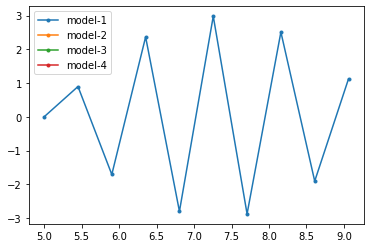

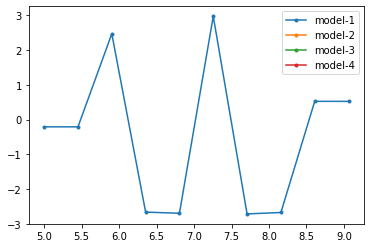

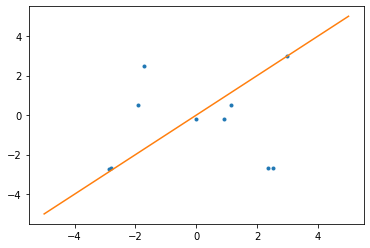

In [11]:
plot_all_model_pot_vs_freq(X, Y, num_examples_list)
plot_all_model_pot_vs_freq(X, Y_pred, num_examples_list)

plt.plot(Y, Y_pred, marker = ".", linestyle = "None")
plt.plot([-5, 5], [-5, 5])
plt.show()

In [10]:
!nvidia-smi

Mon Oct 11 05:56:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.12       Driver Version: 472.12       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0    21W /  N/A |    715MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------